# Welcome

In this exercises notebook you are going to to a small hackathon. The dataset is in `data/mini_hackathon_data.csv`. As you may have guessed, it is an imbalanced dataset. Your objective is to apply what you've learned in the Learning Notebook of this unit to develop a machine learning model and its respective analysis.

# Dataset Overview

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Objectives

1. Read and clean/preprocess the data
2. perform Exploratory Data Analysis to understand the data
3. create a baseline model (you shouln't try a very complex model here nor search for hyperparameters)
4. Analyze performance of your model in different metrics.
5. **Very Important** Perform a threshold analysis and choose a threshold that you think makes sense for the business. Justify your choice with a small text explanation in a markdown cell that highlights the trade-off you are accepting.
6. (if you still have remaining time) perform cross validation on more complex models and a broad search of hyperparameters
7. Redo your analysis and report the comparisson of your baseline model against your improved model
8. List future work you would like to try if you had more time

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv(os.path.join('data','mini_hackathon_data.csv'))#,index_col='Time')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
X = df.drop(columns=['Time','Class'])
y = df['Class']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) #stratify mantem a mesma distribuição de classes que o set original
# train validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [10]:
y.value_counts().to_frame('Value').assign(perc = lambda x: x/x.sum()).round(2)

,Value,perc
0,284315,1.0
1,492,0.0


Dataset unbalanced por isso balancear o class_weight e testar para 2 modelos (logistic regression e DecisionTree)

In [11]:
lf = LogisticRegression(class_weight='balanced')
lf.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dt_model.fit(X_train,y_train)

c:\Users\JoaoViegas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [15]:
lf_prediction = lf.predict(X_val)
dt_prediction = dt_model.predict(X_val)

lf_report = classification_report(y_val,lf_prediction)
dt_report = classification_report(y_val, dt_prediction)

In [19]:
print(lf_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     45490
           1       0.05      0.86      0.10        79

    accuracy                           0.97     45569
   macro avg       0.53      0.92      0.54     45569
weighted avg       1.00      0.97      0.99     45569



In [20]:
print(dt_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45490
           1       0.09      0.76      0.16        79

    accuracy                           0.99     45569
   macro avg       0.55      0.87      0.58     45569
weighted avg       1.00      0.99      0.99     45569



CONFUSION MATRIX

In [21]:
def plot_confusion_matrix(cm):
    # Plotting the confusion matrix
    plt.figure(figsize=(6,4));
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False);  # fmt='g' is for integer formatting
    plt.xlabel('Predicted Labels');
    plt.ylabel('True Labels');
    plt.title('Confusion Matrix');
    plt.show();

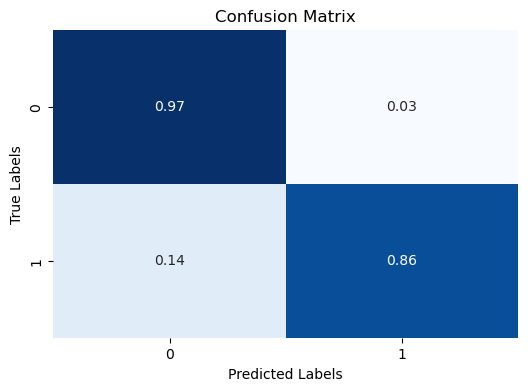

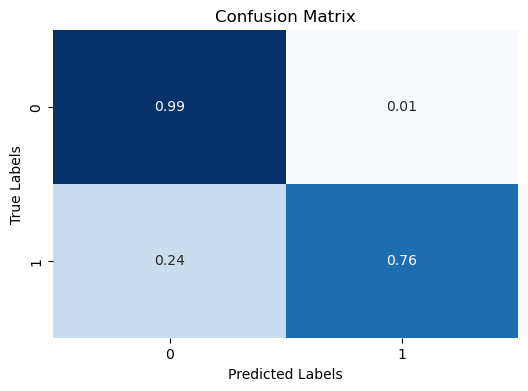

In [23]:
lf_cm = confusion_matrix(y_val, lf_prediction)
dt_cm = confusion_matrix(y_val, dt_prediction)

lf_cm_freq = (lf_cm / lf_cm.sum(axis=1)[:, np.newaxis]).round(2)
dt_cm_freq = (dt_cm / dt_cm.sum(axis=1)[:, np.newaxis]).round(2)

plot_confusion_matrix(lf_cm_freq)
plot_confusion_matrix(dt_cm_freq)

THRESHOLD ANALYSIS

In [24]:
lf_probas = lf.predict_proba(X_val)[:,1]
dt_probas = dt_model.predict_proba(X_val)[:,1]

ths = np.arange(0.1,1,step=0.1)


In [42]:
lf_results = []
for decision_threshold in ths:
    th_preds = (lf_probas > decision_threshold).astype(int)

    recall = recall_score(y_val,th_preds)
    precision = precision_score(y_val,th_preds)
    accuracy = accuracy_score(y_val,th_preds)
    f1 = f1_score(y_val,th_preds)
    
    lf_results.append({"decision_threshold":decision_threshold, "f1-score":f1,"recall":recall,"precision":precision,"accuracy":accuracy})

lf_results = pd.DataFrame(lf_results).set_index('decision_threshold')
lf_results

,f1-score,recall,precision,accuracy
decision_threshold,,,,
0.1,0.016214,0.949367,0.008177,0.800281
0.2,0.031732,0.898734,0.016151,0.904913
0.3,0.050383,0.873418,0.025940,0.942922
0.4,0.074514,0.873418,0.038917,0.962387
0.5,0.102179,0.860759,0.054313,0.973776
0.6,0.124164,0.822785,0.067149,0.979877
0.7,0.161893,0.822785,0.089779,0.985231
0.8,0.217391,0.822785,0.125241,0.989730
0.9,0.312195,0.810127,0.193353,0.993812


<AxesSubplot:xlabel='decision_threshold'>

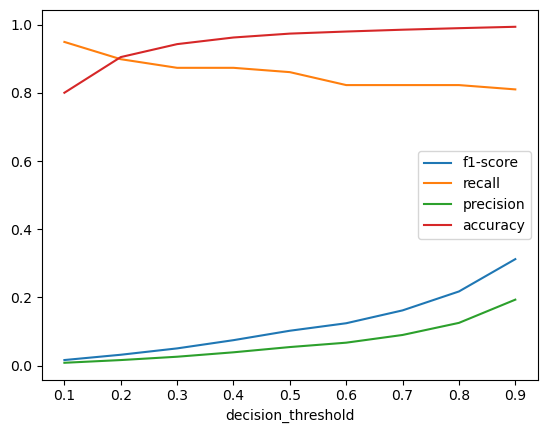

In [43]:
lf_results.plot()

In [44]:
dt_results = []
for decision_threshold in ths:
    th_preds = (dt_probas > decision_threshold).astype(int)

    recall = recall_score(y_val,th_preds)
    precision = precision_score(y_val,th_preds)
    accuracy = accuracy_score(y_val,th_preds)
    f1 = f1_score(y_val,th_preds)
    
    dt_results.append({"decision_threshold":decision_threshold, "f1-score":f1,"recall":recall,"precision":precision,"accuracy":accuracy})

dt_results = pd.DataFrame(dt_results).set_index('decision_threshold')
dt_results

,f1-score,recall,precision,accuracy
decision_threshold,,,,
0.1,0.020112,0.860759,0.010175,0.854594
0.2,0.063137,0.822785,0.032828,0.957669
0.3,0.063137,0.822785,0.032828,0.957669
0.4,0.063137,0.822785,0.032828,0.957669
0.5,0.164835,0.759494,0.092450,0.986658
0.6,0.164835,0.759494,0.092450,0.986658
0.7,0.164835,0.759494,0.092450,0.986658
0.8,0.164835,0.759494,0.092450,0.986658
0.9,0.164835,0.759494,0.092450,0.986658


<AxesSubplot:xlabel='decision_threshold'>

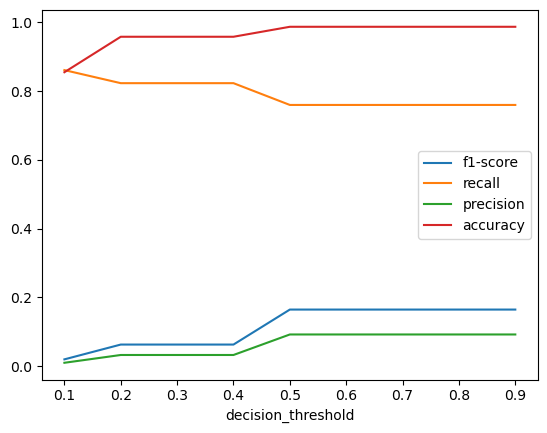

In [45]:
dt_results.plot()

ROC CURVE


In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC curve')

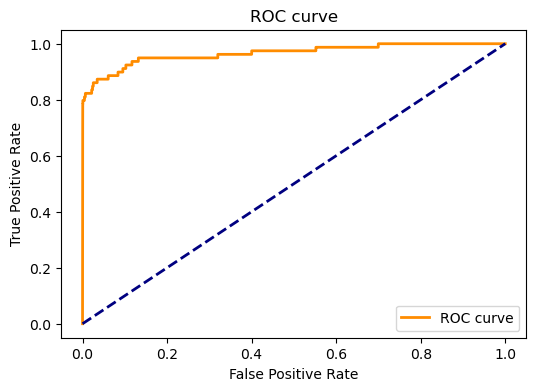

0.9659025074366046

In [47]:
fpr, tpr, thresholds = roc_curve(y_val, lf_probas)

# plot the curve
plt.figure(figsize=(6,4));
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve');
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--'); # random model
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve');
plt.legend(loc="lower right");
plt.show();
roc_auc_score(y_val, lf_probas)

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC curve')

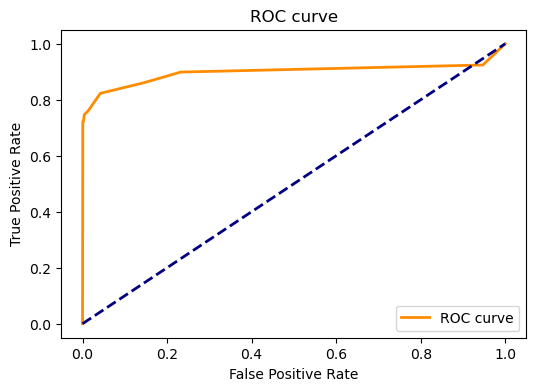

0.8982655806951589

In [48]:
fpr, tpr, thresholds = roc_curve(y_val, dt_probas)

# plot the curve
plt.figure(figsize=(6,4));
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve');
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--'); # random model
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC curve');
plt.legend(loc="lower right");
plt.show();
roc_auc_score(y_val, dt_probas)

AVERAGE PRECISION

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision-Recall curve')

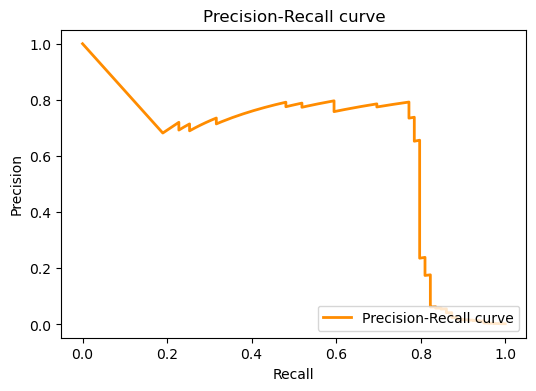

0.6000239400599103

In [49]:
from sklearn.metrics import average_precision_score, precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, lf_probas)

# plot the curve
plt.figure(figsize=(6,4));
plt.plot(recalls, precisions, color='darkorange', lw=2, label='Precision-Recall curve');
#plt.plot([0, 1], [y_val.mean(), y_val.mean()], color='navy', lw=2, linestyle='--'); # random model
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('Precision-Recall curve');
plt.legend(loc="lower right");
plt.show();
average_precision_score(y_val, lf_probas)

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision-Recall curve')

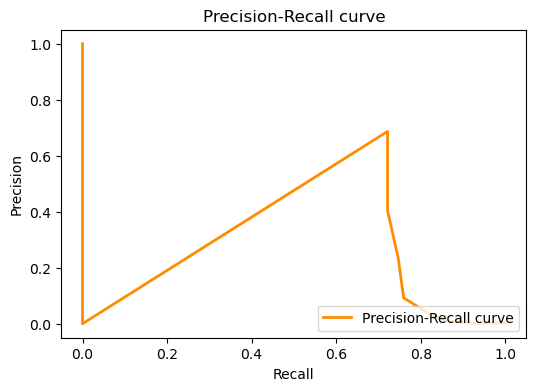

0.5054909257168977

In [50]:
from sklearn.metrics import average_precision_score, precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, dt_probas)

# plot the curve
plt.figure(figsize=(6,4));
plt.plot(recalls, precisions, color='darkorange', lw=2, label='Precision-Recall curve');
#plt.plot([0, 1], [y_val.mean(), y_val.mean()], color='navy', lw=2, linestyle='--'); # random model
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('Precision-Recall curve');
plt.legend(loc="lower right");
plt.show();
average_precision_score(y_val, dt_probas)

No meu entender, para o caso específicio de fraudes em transações queremos valorizar a precisão, dado que mais vale deixar escapar alguns bandidos do que acusar pessoas inocentes de fraude. Por toda a análise que foi feita, a Logistic Regression apresenta uma maior precisão comparado com a DecisionTree. Em relação à threshold analysis, verifiquei que quanto maior o threshold, maior é a precision e f1-score, por isso um threshold maior é mais benéfico para esta aplicação. Também verifiquei que a PR curve e a ROC curve são melhores na Logistic Regression.

In [55]:
custom_threshold = 0.9

y_pred_prob = lf.predict_proba(X_test)[:, 1]

y_pred_custom = (y_pred_prob >= custom_threshold).astype(int)

lf_report = classification_report(y_test,y_pred_custom)
print(lf_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.90      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.95      0.70     56962
weighted avg       1.00      1.00      1.00     56962



Achei estranho a Logistic Regression ter melhor performance que a decision tree visto que teoricamente apresenta menos complexidade, por isso penso que o próximo passo seria encontrar os hyperparameters ideais da DecisionTree para obter maior precision ou f1-score. Isto pode ser feito através de um GridSearch, tal como apresentado em baixo. (Não consegui acabar porque demorou muito tempo a correr).

HYPERPARAMETER GRIDSEARCH FOR DECISION TREE

In [41]:
from sklearn.model_selection import GridSearchCV

In [52]:
dt_improved = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'], 
              'max_depth': [None,5,10,15],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4]
            }

grid_search = GridSearchCV(estimator=dt_improved, param_grid=param_grid, scoring ='f1', cv=5)

grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_val)
f1 = f1_score(y_val,y_pred)

print("Best parameters: ", best_params)
print("Best F1-score: ", f1)

KeyboardInterrupt: 